## Dependencies

In [262]:
import geopandas as gpd
import joblib
import numpy as np
import odc.geo.xr  # noqa: F401
import pandas as pd
import xarray as xr
import matplotlib as plt
import matplotlib.pyplot as pyplot
import rasterio as rio
from rasterio import plot
from odc.stac import load
from pystac_client import Client
from shapely import geometry
from shapely.geometry import shape, Polygon, MultiPolygon
from sklearn.ensemble import RandomForestClassifier
from dask.distributed import Client as dask_client
import warnings
warnings.filterwarnings('ignore')

In [263]:
# Read in data inputs
aoi = gpd.read_file("RiPyrian/wavuwavu_extent.geojson")
river_bounds = gpd.read_file("RiPyrian/wavuwavu_river.geojson")

In [264]:
lulc_dataarray = xr.DataArray("LULC_2023_wavuwavu_extent")
lulc_dataarray

<xarray.DataArray ()>
array('LULC_2023_wavuwavu_extent', dtype='<U25')

In [265]:
da = rio.open("RiPyrian/LULC_2023_wavuwavu_extent.tif")

In [266]:
da

<open DatasetReader name='RiPyrian/LULC_2023_wavuwavu_extent.tif' mode='r'>

In [267]:
with rio.open("RiPyrian/LULC_2023_wavuwavu_extent.tif") as src:
  # Get data and associated information
  data = src.read(1)  # Assuming single band data, adjust for multi-band
  transform = src.transform  # Get the geotransformation


In [268]:
data

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 4, ..., 3, 3, 3],
       [3, 3, 3, ..., 4, 3, 3],
       [3, 3, 3, ..., 4, 3, 3]], dtype=uint8)

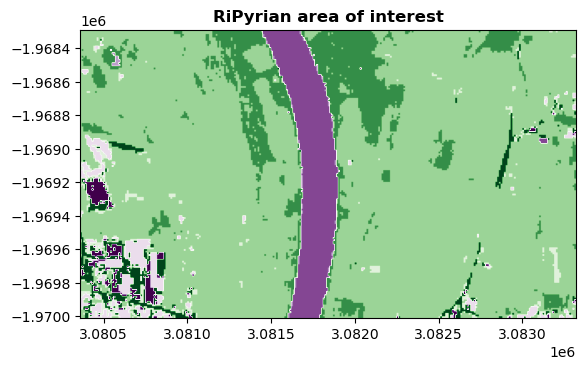

<Axes: title={'center': 'RiPyrian area of interest'}>

In [292]:
# Plot the data using rasterio.plot
plot.show(data, cmap='PRGn_r', transform=transform, title="RiPyrian area of interest")
# plt.show(cmap='Reds')  # To display the plot in the notebook

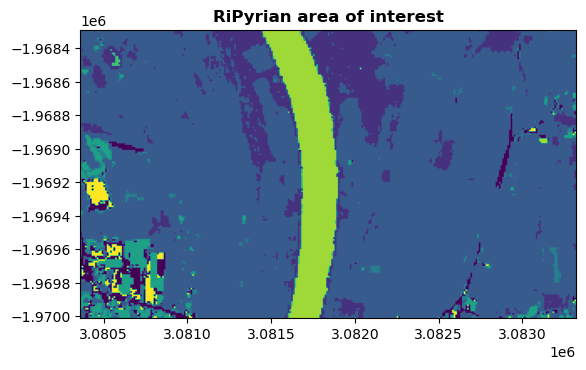

<Axes: title={'center': 'RiPyrian area of interest'}>

In [293]:
# Plot the data using rasterio.plot
plot.show(data, cmap='viridis', transform=transform, title="RiPyrian area of interest")
# plt.show(cmap='Reds')  # To display the plot in the notebook

In [271]:
dataarray = xr.DataArray(da)
dataarray

<xarray.DataArray 'RiPyrian/LULC_2023_wavuwavu_extent.tif' ()>
array(<open DatasetReader name='RiPyrian/LULC_2023_wavuwavu_extent.tif' mode='r'>,
      dtype=object)

In [272]:
river_bounds = river_bounds.fillna(0)
river_bounds

,id,geometry
0,0.0,"MULTIPOLYGON (((177.68288 -17.53067, 177.68287..."


In [273]:
river_bounds.describe

<bound method NDFrame.describe of     id                                           geometry
0  0.0  MULTIPOLYGON (((177.68288 -17.53067, 177.68287...>

In [274]:
river_bounds.type

0    MultiPolygon
dtype: object

TypeError: string indices must be integers, not 'str'

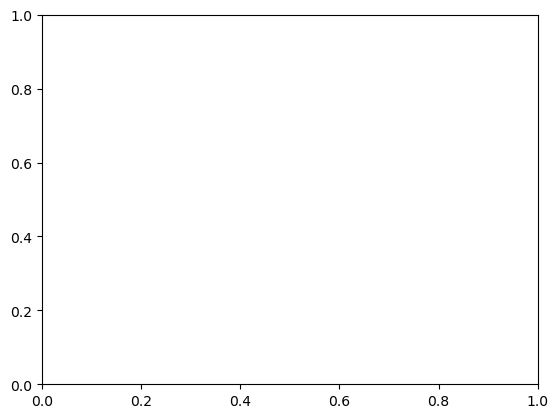

In [275]:
# Create a plot using Matplotlib's subplots function
fig, ax = pyplot.subplots()

# Visualize each feature in the collection
for feature in river_bounds:
    geometry = shape(feature["geometry"])

    # Check for MultiPolygon and iterate through its individual polygons
    if geometry.type == "MultiPolygon":
        for MultiPolygon in geometry.geoms:
            x, y = polygon.exterior.xy
            ax.plot(x, y, color='red', alpha=0.5)  # Adjust color and transparency
    else:
        # Handle other geometry types (points, lines) as before
        # ...

# Optional: Set plot limits based on all feature coordinates
# ... (set extent based on all geometries)

# Display the plot
        pyplot.show()

In [276]:
# Visualize each feature in the collection (assuming only MultiPolygons)
for feature in river_bounds["features"]:
    geometry = shape(feature["geometry"])
    # Extract and plot all Polygon geometries from the MultiPolygon
    polygons = geometry.geoms if geometry.type == "MultiPolygon" else [geometry]
    for polygon in polygons:
        x, y = polygon.exterior.xy
        ax.plot(x, y, color='blue', alpha=0.5)  # Adjust color and transparency


KeyError: 'features'

TypeError: string indices must be integers, not 'str'

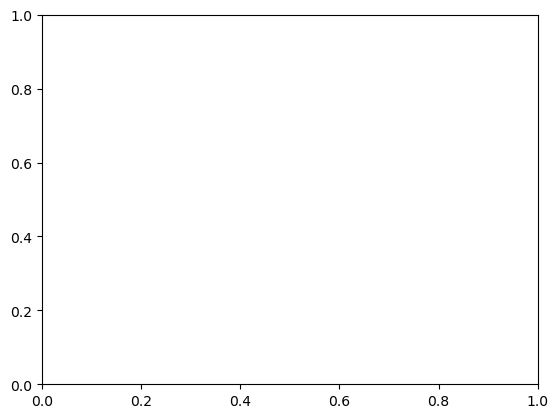

In [277]:
import matplotlib.pyplot as plt
from shapely.geometry import shape, Polygon, MultiPolygon

# Assuming river_bounds is a GeoDataFrame loaded from your GeoJSON data

# Create a plot using Matplotlib's subplots function
fig, ax = plt.subplots()

# Visualize each feature in the collection (assuming only MultiPolygons)
for feature in river_bounds:
    geometry = shape(feature["geometry"])  # Access geometry using column name
    # ... (rest of your code to handle MultiPolygons)

# ... (rest of your code for plotting, etc.)



In [278]:
for feature in river_bounds:
    geometry = shape(feature[0])

AttributeError: 'str' object has no attribute 'get'

<Axes: >

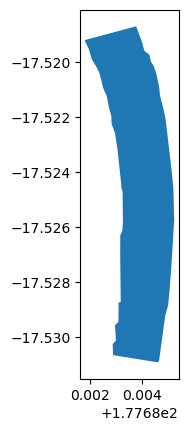

In [280]:
river_bounds.plot()

In [286]:
river_lines = river_bounds.boundary

<Axes: >

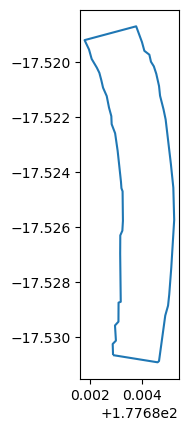

In [287]:
river_lines.plot()